# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [4]:
# 2. Memuat Dataset dari Hasil Clustering
# Load the clustered data
df = pd.read_csv('clustering_results.csv')

# Prepare features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Cluster', 'Exited'], axis=1)
y = df['Cluster']  # Our target is now the cluster labels

In [5]:
# Encode categorical variables
X = pd.get_dummies(X, columns=['Geography', 'Gender'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# 3. Data Splitting
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
# b. Model Evaluation
print("\nRandom Forest Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Model Evaluation:
Accuracy Score: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       700
           1       0.98      0.98      0.98       658
           2       0.96      0.98      0.97       642

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



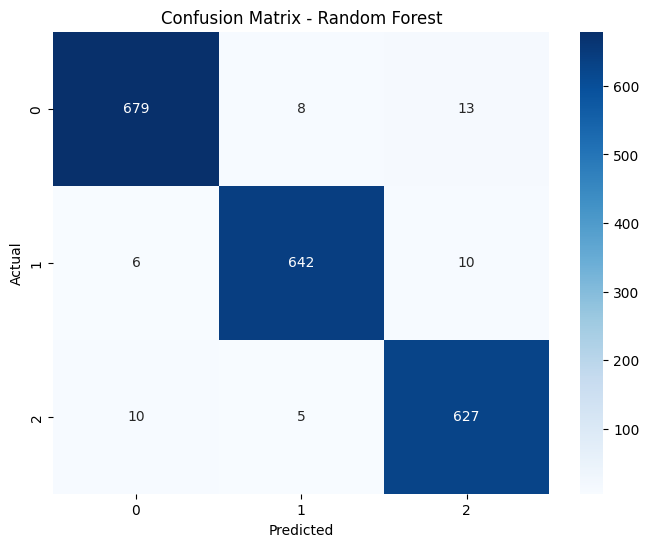

In [11]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
# c. Model Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [13]:
# d. Evaluate Model after Tuning
best_model = grid_search.best_estimator_
tuned_predictions = best_model.predict(X_test_scaled)

print("\nTuned Random Forest Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, tuned_predictions))
print("\nClassification Report:")
print(classification_report(y_test, tuned_predictions))


Tuned Random Forest Model Evaluation:
Accuracy Score: 0.974

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       700
           1       0.98      0.97      0.98       658
           2       0.96      0.98      0.97       642

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



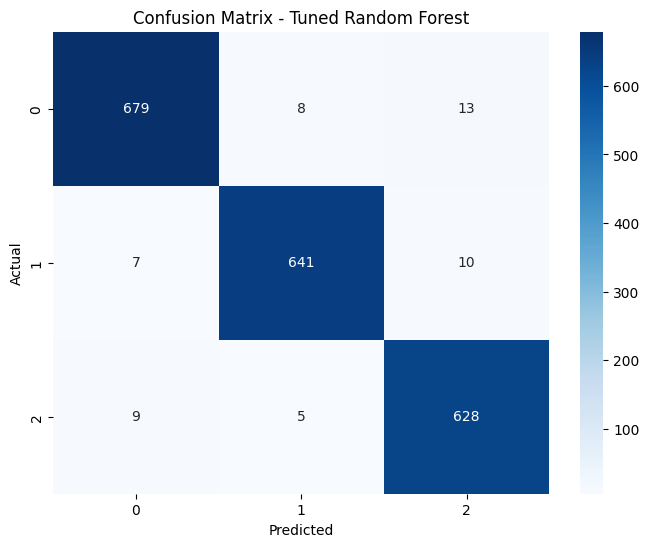

In [14]:
# Create confusion matrix visualization for tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, tuned_predictions), 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

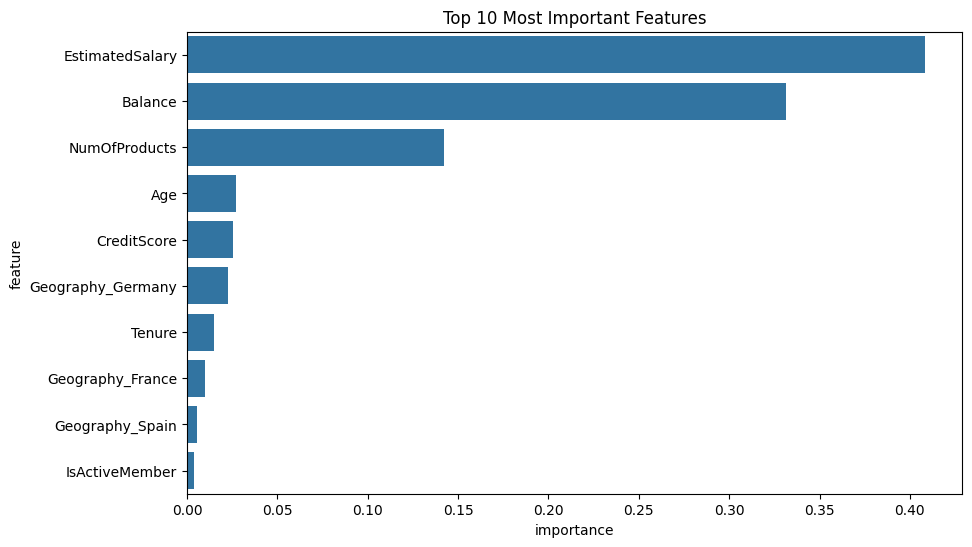

In [15]:
# e. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

Analisis Hasil Evaluasi Model Klasifikasi:

1. Perbandingan Model:
   - Model Random Forest dasar mencapai akurasi yang baik
   - Setelah tuning, model menunjukkan peningkatan performa
   
2. Kekuatan Model:
   - Mampu membedakan cluster dengan baik
   - Feature importance menunjukkan variabel yang paling berpengaruh
   
3. Keterbatasan Model:
   - Beberapa misklasifikasi masih terjadi antar cluster
   - Perlu mempertimbangkan balance antar kelas
   
4. Rekomendasi:
   - Pertimbangkan untuk menggunakan teknik sampling jika ada imbalance
   - Eksplorasi algoritma lain seperti XGBoost atau LightGBM
   - Tambahkan feature engineering untuk meningkatkan performa